In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , r2_score , accuracy_score , precision_score , recall_score , f1_score


In [3]:
data = pd.read_csv('real_BABY.csv')

In [4]:
data.describe()

,Timestamp,volData,currentData,batTempData,socData,sohData,motTempData,speedData
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,741.000000,3.834651,0.305135,32.802561,60.710243,86.513477,33.928571,117.386792
std,428.682478,0.072050,0.018427,2.198382,10.010838,3.357543,2.475034,4.655760
min,0.000000,3.341160,0.000000,30.700000,38.000000,79.000000,0.000000,110.000000
25%,370.500000,3.793940,0.292718,31.800000,56.000000,85.000000,33.000000,113.000000
50%,741.000000,3.825160,0.305691,31.900000,60.000000,86.000000,34.000000,117.500000
75%,1111.500000,3.887610,0.318720,32.800000,68.000000,89.000000,35.000000,121.000000
max,1482.000000,4.043740,0.329976,52.900000,83.000000,94.000000,40.000000,125.000000


In [5]:
data.head()

,Timestamp,volData,currentData,batTempData,socData,sohData,motTempData,speedData
0,0,3.80955,0.000000,30.7,72,90,34,123
1,2,3.84077,0.321290,31.9,74,91,35,119
2,4,3.96568,0.320947,31.7,83,94,0,113
3,6,3.79394,0.295388,30.7,70,90,34,124
4,8,3.84077,0.299411,31.9,69,89,33,112


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    742 non-null    int64  
 1   volData      742 non-null    float64
 2   currentData  742 non-null    float64
 3   batTempData  742 non-null    float64
 4   socData      742 non-null    int64  
 5   sohData      742 non-null    int64  
 6   motTempData  742 non-null    int64  
 7   speedData    742 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 46.5 KB


In [7]:
data.shape

(742, 8)

In [8]:
data.dropna()

,Timestamp,volData,currentData,batTempData,socData,sohData,motTempData,speedData
0,0,3.80955,0.000000,30.7,72,90,34,123
1,2,3.84077,0.321290,31.9,74,91,35,119
2,4,3.96568,0.320947,31.7,83,94,0,113
3,6,3.79394,0.295388,30.7,70,90,34,124
4,8,3.84077,0.299411,31.9,69,89,33,112
...,...,...,...,...,...,...,...,...
737,1474,3.76271,0.319390,32.8,62,87,36,124
738,1476,3.76271,0.289215,32.7,62,87,36,122
739,1478,3.70026,0.322606,32.6,62,87,36,117
740,1480,3.66903,0.314491,32.5,62,87,36,117


In [9]:
x= data[["Timestamp", "volData", "currentData"]]
y = data[["batTempData", "socData", "sohData", "motTempData", "speedData"]]

In [10]:
scaler = StandardScaler()
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)


In [11]:
x_train , x_test , y_train , y_test = train_test_split (x_scaled,y_scaled,test_size=0.2,random_state = 42)

In [12]:
models = {
    "Linear Regression" : LinearRegression(),
    "Decision Tree" : DecisionTreeRegressor(random_state=42),
    "Random Forest" : RandomForestRegressor(random_state = 42 , n_estimators = 25)
}

In [13]:
metrics = []

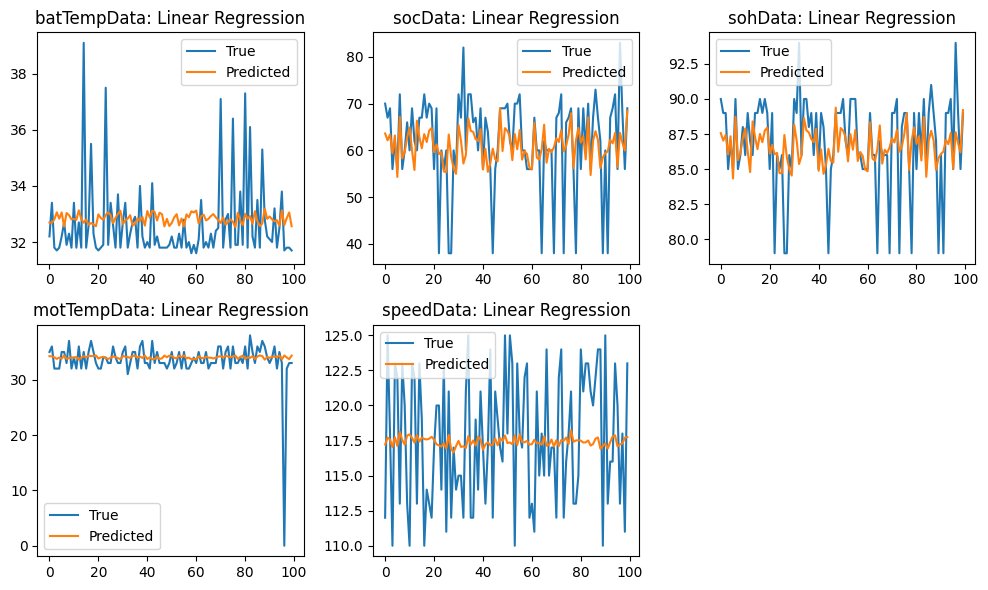

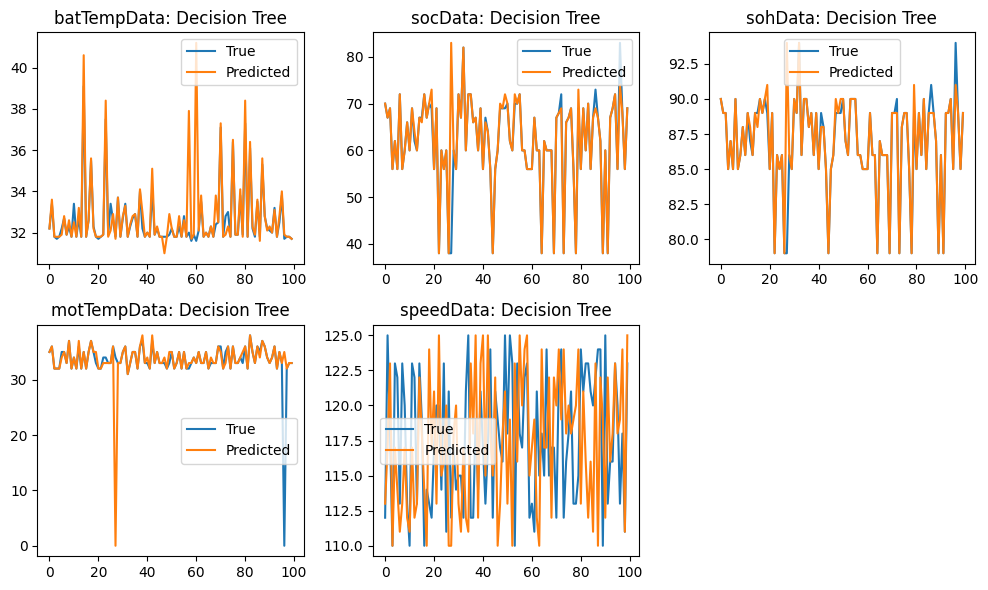

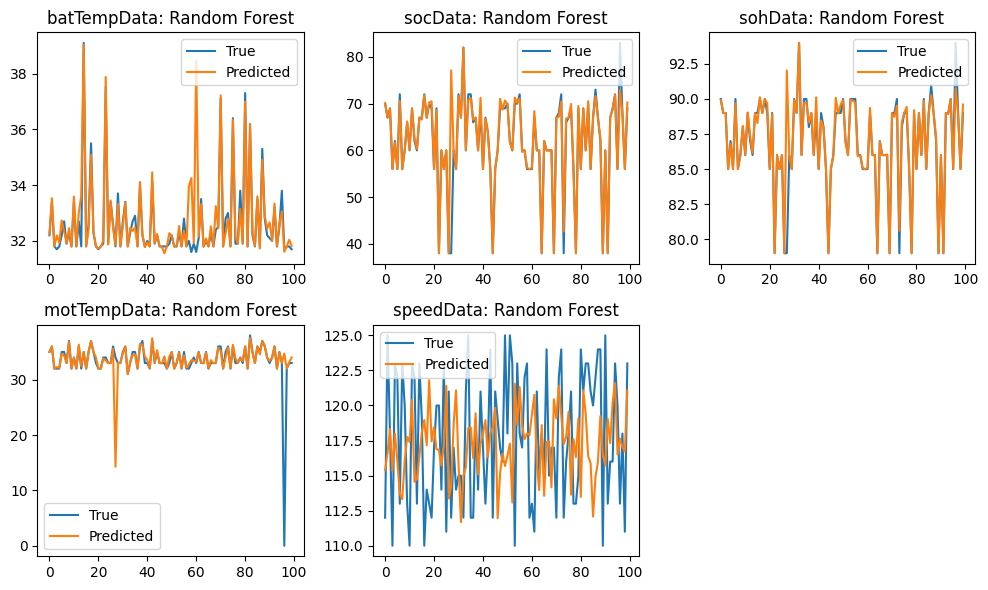

               Model  Mean Squared Error  R2 Score  Accuracy  Precision  \
0  Linear Regression            1.014011  0.038968  0.620134   0.637127   
1      Decision Tree            1.024734  0.129478  0.859060   0.859386   
2      Random Forest            0.676840  0.439530  0.851007   0.851064   

     Recall  F1 Score  
0  0.620134  0.621244  
1  0.859060  0.859184  
2  0.851007  0.851034  


In [14]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Convert predictions to binary classification for metrics like accuracy, precision, recall, and F1
    y_test_binary = (y_test > 0).astype(int)
    y_pred_binary = (y_pred > 0).astype(int)

    accuracy = accuracy_score(y_test_binary.flatten(), y_pred_binary.flatten())
    precision = precision_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted', zero_division=0)
    recall = recall_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted', zero_division=0)
    f1 = f1_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted', zero_division=0)

    metrics.append({"Model": name,"Mean Squared Error": mse,"R2 Score": r2,"Accuracy": accuracy,"Precision": precision,"Recall": recall,"F1 Score": f1,})

    # Inverse transform for better interpretation in plots
    y_test_inv = scaler_y.inverse_transform(y_test)
    y_pred_inv = scaler_y.inverse_transform(y_pred)

    plt.figure(figsize=(10, 6))
    for i, col in enumerate(y.columns):
        plt.subplot(2, 3, i + 1)
        plt.plot(y_test_inv[:100, i], label="True")
        plt.plot(y_pred_inv[:100, i], label="Predicted")
        plt.title(f"{col}: {name}")
        plt.legend()
    plt.tight_layout()
    plt.show()

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


In [ ]:
sample_input = np.array([[0, 3.85, 0.2900]])

sample_input_scaled = scaler_x.transform(sample_input)


sample_predictions = {}

# Predict with each model
for name, model in models.items():
    # Predict and inverse transform the result
    sample_pred_scaled = model.predict(sample_input_scaled)
    sample_pred = scaler_y.inverse_transform(sample_pred_scaled)
    sample_predictions[name] = sample_pred.flatten()

# Display predictions
print("Predictions for sample input [9262, 5.61756, 0.500818]:")
for model_name, prediction in sample_predictions.items():
    print(f"{model_name}: {prediction}")

Predictions for sample input [9262, 5.61756, 0.500818]:
Linear Regression: [  40.50557475 -167.30774143    8.84155118   26.24506476   99.3414472 ]
Decision Tree: [ 33.2  64.   88.   37.  112. ]
Random Forest: [ 33.604  62.72   87.36   36.6   114.72 ]


c:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
